<a href="https://colab.research.google.com/github/gplinkage/Data-Science-ML-AI/blob/main/Projects/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from PIL import Image
import os
from IPython.display import display
import zipfile
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [5]:
# Loading data and Image Augmentation
image_folder_path = '/content/drive/MyDrive/Data Science/All Raw-Data/Brain Tumor dataset'
image_files = [file for file in os.listdir('/content/drive/MyDrive/Data Science/All Raw-Data/Brain Tumor dataset/Training') if file.endswith('.jpg')]
for file in image_files:
  file_path = os.path.join('/content/drive/MyDrive/Data Science/All Raw-Data/Brain Tumor dataset/Training', file)
  image = Image.open(file_path)
  resized_image = image.resize((256, 256))
  resized_image.show()

In [8]:
# Loading data and Image Augmentation
image_folder_path = '/content/drive/MyDrive/Data Science/All Raw-Data/Brain Tumor dataset'
image_files = [file for file in os.listdir(image_folder_path) if file.endswith('.jpg') or file.endswith('.png')]
for file in image_files:
  file_path = os.path.join(image_folder_path, file)
  image = Image.open(file_path)
  display(image)

In [31]:
# Loading data and Image Augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Data Science/All Raw-Data/Brain Tumor dataset/Training',
batch_size=30,
target_size=(150, 150))
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory('/content/drive/MyDrive/Data Science/All Raw-Data/Brain Tumor dataset/Testing', batch_size=30,
target_size=(150, 150))

Found 2864 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [32]:
labels_2=['glioma','meningioma','notumor','pituitary']

In [33]:
# Display the count of each unique classes
labels = validation_generator.labels
labels_series = pd.Series(labels)
value_counts = labels_series.value_counts()
print(value_counts)

1    115
2    105
0    100
3     74
dtype: int64


In [34]:
# Display the count of each unique classes
labels = train_generator.labels
labels_series = pd.Series(labels)
value_counts = labels_series.value_counts()
print(value_counts)

3    827
0    826
1    816
2    395
dtype: int64


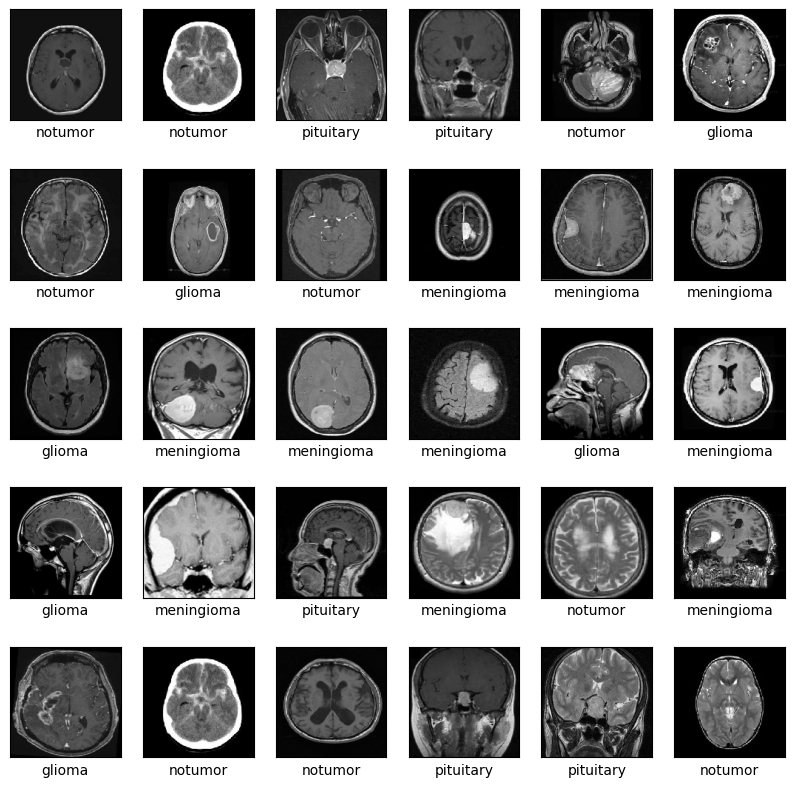

In [37]:
# Display some images
i = 0
batch_size = validation_generator.batch_size
if i < len(validation_generator):
  batch_images, batch_labels = validation_generator[i]
  plt.figure(figsize=(10, 10))
  for idx in range(batch_size):
      plt.subplot(5, 6, idx + 1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)

      plt.imshow(batch_images[idx])
      class_index = np.argmax(batch_labels[idx])
      class_name = labels_2[class_index]
      plt.xlabel(class_name)

      if idx >= batch_size - 1:
        break
else:
 print("Invalid batch index!")

In [39]:
# Building model
model=Sequential()
model.add(Conv2D(filters=50, kernel_size=5,
                  strides=1, activation='relu',
                  input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Conv2D(filters=100, kernel_size=5,
                strides=1, activation='relu'))

model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(150, activation='relu'))
model.add(Dense(4,activation='softmax'))

# Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [40]:
# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 146, 146, 50)      3800      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 73, 73, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 100)       125100    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 34, 34, 100)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 115600)            0         
                                                                 
 dropout_1 (Dropout)         (None, 115600)           

In [ ]:
# Training Model
history=model.fit(train_generator, epochs=10,validation_data=validation_generator)

Epoch 1/10
96/96 [==============================] - 760s 8s/step - loss: 0.9829 - accuracy: 0.5981 - val_loss: 1.6193 - val_accuracy: 0.4086
Epoch 2/10
96/96 [==============================] - 410s 4s/step - loss: 0.4848 - accuracy: 0.8128 - val_loss: 1.8971 - val_accuracy: 0.5584
Epoch 3/10
96/96 [==============================] - 417s 4s/step - loss: 0.3156 - accuracy: 0.8785 - val_loss: 2.2210 - val_accuracy: 0.6497
Epoch 4/10
96/96 [==============================] - 409s 4s/step - loss: 0.2159 - accuracy: 0.9172 - val_loss: 2.0947 - val_accuracy: 0.6954
Epoch 5/10
96/96 [==============================] - 408s 4s/step - loss: 0.1428 - accuracy: 0.9497 - val_loss: 2.1809 - val_accuracy: 0.7157
Epoch 6/10
96/96 [==============================] - 409s 4s/step - loss: 0.1191 - accuracy: 0.9578 - val_loss: 2.2885 - val_accuracy: 0.7234
Epoch 7/10
96/96 [==============================] - 408s 4s/step - loss: 0.0785 - accuracy: 0.9731 - val_loss: 3.3788 - val_accuracy: 0.6777
Epoch 8/10
 9

In [ ]:
# Loss Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],ls='--')
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")
plt.show()

In [ ]:
# Accuracy Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],ls='--')
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Curve")
plt.show()

In [ ]:
# Model Evaluation
model.evaluate(validation_generator)

In [ ]:
# predict some records
i=0
batch_size = validation_generator.batch_size

if i < len(validation_generator):
      batch_images, batch_labels = validation_generator[i]
      plt.figure(figsize=(10,10))
      for idx in range(batch_size):
          plt.subplot(5, 6, idx + 1)
          plt.xticks([])
          plt.yticks([])
          plt.grid(False)
          plt.imshow(batch_images[idx])
          class_index = np.argmax(batch_labels[idx])
          class_name = labels_2[class_index]
          plt.xlabel(class_name)
          if idx >= batch_size - 1:
            break
else:
  print("Invalid batch index!")